In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import pandas as pd
df = pd.read_csv("sales_datas.csv")
print(df)


                     brand_name  price     pants_category        Date  \
0                         WROGN   1374    Loose Fit Jeans  03-06-2025   
1                      Roadster    759  Regular Fit Jeans  04-06-2025   
2                         Levis    944  Regular Fit Jeans  06-06-2025   
3                      Roadster   1024        Baggy Jeans  03-06-2025   
4                      Roadster    874        Baggy Jeans  01-06-2025   
...                         ...    ...                ...         ...   
3743                   Roadster    759  Regular Fit Jeans  06-06-2025   
3744  United Colors of Benetton    759  Regular Fit Jeans  06-06-2025   
3745                      WROGN   1374    Loose Fit Jeans  03-06-2025   
3746                   Roadster    759  Regular Fit Jeans  02-06-2025   
3747  United Colors of Benetton    759  Regular Fit Jeans  01-06-2025   

      ratings  number_of_ratings  
0         4.2                 57  
1         4.0                 63  
2         4.1     

In [16]:
import pandas as pd

brand_revenue = df.groupby("brand_name")["price"].sum().reset_index()

print('Brand revenue: \n',brand_revenue.to_string(index=False))

total_revenue = df['price'].sum()

print(f"Total revenue:₹{total_revenue:,}")


Brand revenue: 
                brand_name   price
                  FUGAZEE    2199
           Flying Machine   36688
                    Levis   35111
                    Mufti    4782
                 Roadster 1038867
                   SPYKAR  105510
U.S. Polo Assn. Denim Co.   35401
United Colors of Benetton 1486853
                   V-Mart  260203
                    WROGN 1681462
Total revenue:₹4,687,076


In [ ]:
category_sales = df.groupby("pants_category")["price"].sum().reset_index()

# Sort categories by sales in descending order
best_selling_categories = category_sales.sort_values(by="price", ascending=False)

print(best_selling_categories.to_string(index=False))

   pants_category   price
Regular Fit Jeans 2826737
  Loose Fit Jeans 1560102
      Cargo Jeans  194382
      Baggy Jeans  105855


In [20]:

brand_sales = df.groupby("brand_name")["price"].sum().reset_index()

# Find the brand with peak sales
peak_brand = brand_sales.loc[brand_sales["price"].idxmax()]
total_sales= peak_brand["price"]
print("Top Brand:", peak_brand["brand_name"])
print(f"Total Sales:₹{total_sales:,}" )

Top Brand: WROGN
Total Sales:₹1,681,462


In [21]:

daily_sales = df.groupby("Date")["price"].sum()

# Calculate average sales per day using NumPy
average_sales_per_day = np.mean(daily_sales)

print("Average Sales per Day: {:,.2f}".format(average_sales_per_day))

Average Sales per Day: 781,179.33


In [ ]:
print("DATA SUMMURY")
brand = brand_revenue.loc[brand_revenue['price'].idxmax()]
sales = daily_sales.loc[daily_sales['price'].idxmax()]
print(f"Total revenue: ${df['price'].sum():,}")
print("Best selling Brand:",brand['brand_name'])
print("peak sale date: ",sales["Date"])
print("Average sales per day: {:.2f}".format(daily_sales["price"].mean()))


DATA SUMMURY
Total revenue: $4,687,076
Best selling Brand: WROGN
peak sale date:  05-06-2025
Average sales per day: 781179.33


In [ ]:
print("""
1.'WROGN'
2.'Roadster'
3.'Levis' 
4.'SPYKAR'
5.'V-Mart'
6.'United Colors of Benetton'
7.'Flying Machine'
8.'U.S. Polo Assn. Denim Co.'
9.'Mufti'
10.'FUGAZEE'

""")
s = int(input("Select a Brand: "))
brand = None

if s == 1:
    brand = 'WROGN'
elif s == 2:
    brand = 'Roadster'
elif s == 3:
    brand = 'Levis'
elif s == 4:
    brand = 'SPYKAR'
elif s == 5:
    brand = 'V-Mart'
elif s == 6:
    brand = 'United Colors of Benetton'
elif s == 7:
    brand = 'Flying Machine'
elif s == 8:
    brand = 'U.S. Polo Assn. Denim Co.'
elif s == 9:
    brand = 'Mufti'
elif s == 10:
    brand = 'FUGAZEE'
else:
    print("Invalid Choice")
    
print(brand.center(30,"-"))
brand_data = df[df['brand_name'] == brand]
brand_sales = brand_data["price"].sum()
best_sales = brand_data.groupby("pants_category").size()
total_sales = brand_data.groupby("brand_name").size()

print(f"Total Sales Of {brand}: {brand_sales:,}")
print(f"Best Selling Product:",best_sales.idxmax())
print(f"Total No of Orders:",len(brand_data))




1.'WROGN'
2.'Roadster'
3.'Levis' 
4.'SPYKAR'
5.'V-Mart'
6.'United Colors of Benetton'
7.'Flying Machine'
8.'U.S. Polo Assn. Denim Co.'
9.'Mufti'
10.'FUGAZEE'


------------Levis-------------
Total Sales Of Levis: 35,111
Best Selling Product: Regular Fit Jeans
Total No of Orders: 15


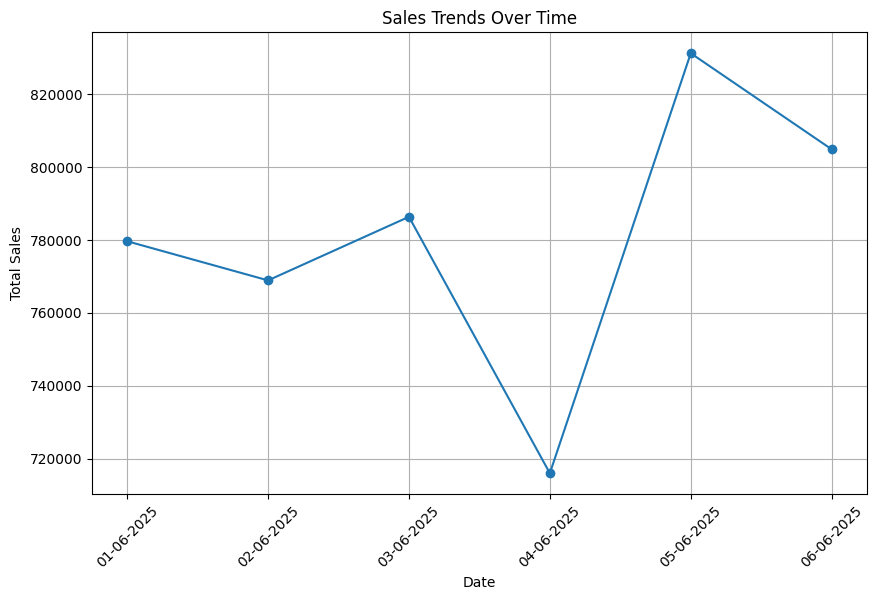

In [8]:
daily_sales = df.groupby("Date")["price"].sum().reset_index()

# Plot line chart
plt.figure(figsize=(10,6))
plt.plot(daily_sales["Date"], daily_sales["price"], marker='o', linestyle='-')

plt.title("Sales Trends Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.grid(True)
plt.xticks(rotation=45)

plt.show()

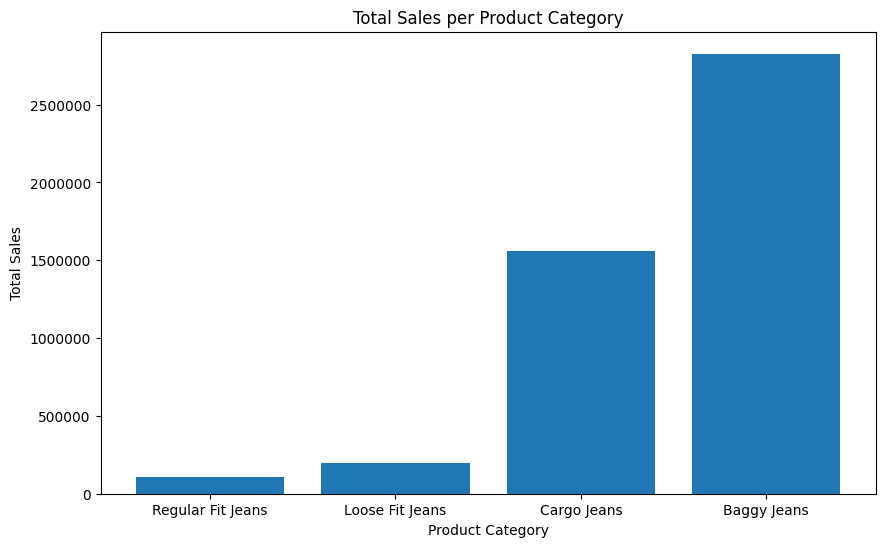

In [9]:


# Plot bar chart
plt.figure(figsize=(10,6))
plt.bar(best_selling_categories["pants_category"], category_sales["price"])

plt.title("Total Sales per Product Category")
plt.xlabel("Product Category")
plt.ylabel("Total Sales")
plt.ticklabel_format(style='plain', axis='y')

#plt.xticks(rotation=45)
plt.show()


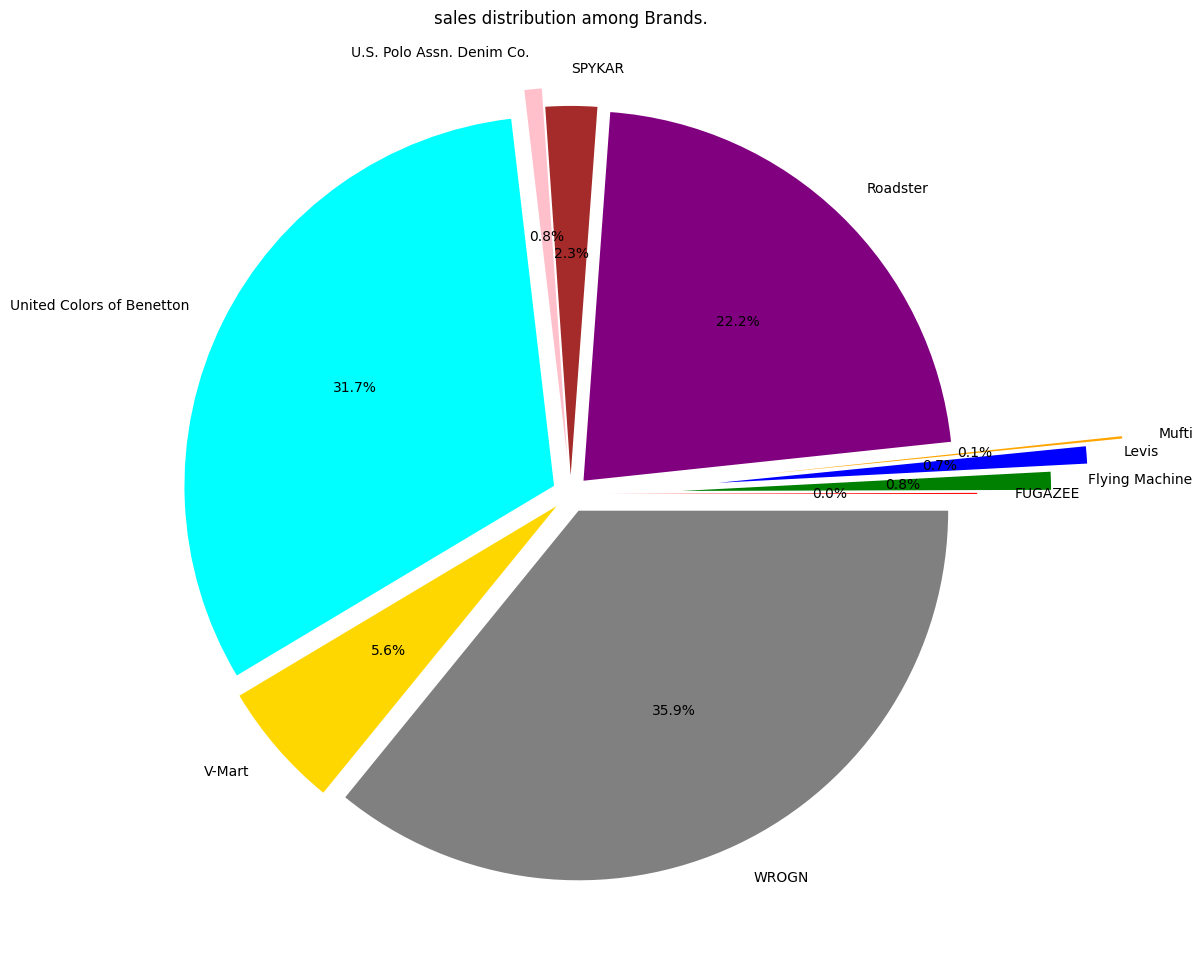

In [10]:
colors = ["red","green","blue","orange","purple",
          "brown","pink","cyan","gold","grey"]
plt.figure(figsize=(12,12))
plt.pie(brand_revenue['price'],
        labels=brand_revenue['brand_name'],
        autopct="%1.1f%%",
        startangle=0,
        colors=colors,
        explode = [0.1,0.3,0.4,0.5,0.05,0.05,0.1,0.05,0.05,0.05],
        )

plt.title("sales distribution among Brands.")
plt.show()

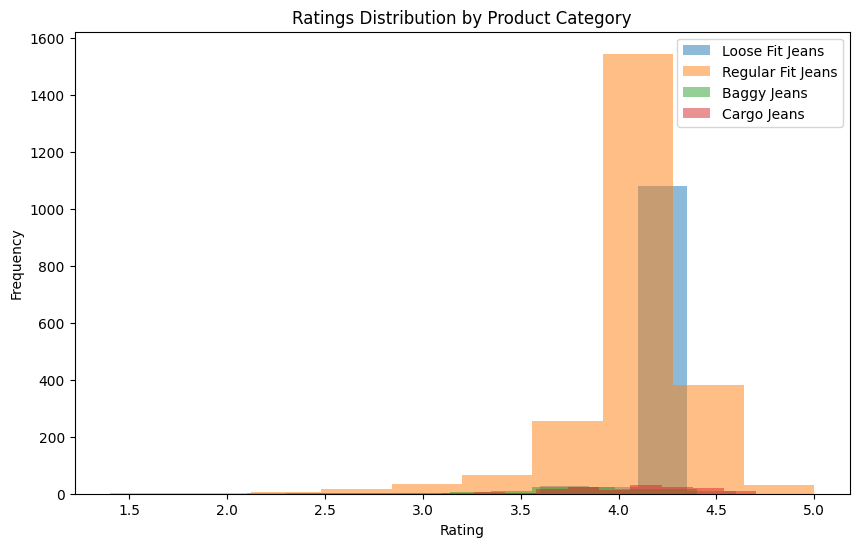

In [30]:
plt.figure(figsize=(10,6))
for category in df['pants_category'].unique():
    subset = df[df['pants_category'] == category]
    plt.hist(subset['ratings'], bins=10, alpha=0.5, label=category)

plt.title("Ratings Distribution by Product Category")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.legend()
plt.show()